In [149]:
using LinearAlgebra

# Introduction to Julia

Reference: [The Julia Documentation](https://docs.julialang.org), [The Julia–Matlab–Python Cheatsheet](https://cheatsheets.quantecon.org)

This lecture gives an overview of Julia. 
In these notes we focus on the aspects of Julia and computing that are essential to numerical computing:


1. Integers: We discuss briefly how to create and manipulate integers, and how to see the underlying bit representation.
1. Strings and parsing: We discuss how to create and manipulate strings and characters, and how we can convert a string
of 0's and 1's to an integer or other type.
3. Vectors and matrices: We discuss how to build and manipulate vectors and matrices (which are both types of _arrays_).
Later lectures will discuss linear algebra.
4. Types: In Julia everything has a type, which plays a similar role to classes in Python. Here we 
discuss how to make new types, for example, a complex number in radial format.
5. Loops and branches: We discuss `if`, `for` and `while`, which work similar to Python.
6. Functions: We discuss the construction of named and anonymous functions.
Julia allows overloading functions for different types, for example, we can overload `*` for 
our radial complex type.
7. Modules, Packages, and Plotting: We discuss how to load external packages, in particular, for plotting.

Note some subsections are labeled *advanced*, these are non-examinable and will not be necessary in 
problem sheets or exams. 

## 1. Integers

Julia uses a math-like syntax for manipulating integers:

In [1]:
1 + 1 # Addition

2

In [2]:
typeof(1) 

Int64

In [3]:
typeof(Int8(1))

Int8

In [2]:
2 * 3 # Multiplication

6

In [3]:
2 / 3 # Division

0.6666666666666666

In [4]:
typeof(2/3)

Float64

In [4]:
x = 5; # semicolon is optional but supresses output if used in the last line 有；的行数出不了结果 只要不是放在最后一行都不影响
x^2 # Powers

25

In [5]:
x = 5 
x^2; # 有；的行数出不了结果 只要不是放在最后一行都不影响

In [6]:
x = 5;
x^3 # n次方 3，20 可以，改成200就不行了，会变成一个负数

125

In Julia everything has a type. This is similar in spirit to
a class in Python, but much more lightweight.
An integer defaults to a type `Int`,
which is either 32-bit (`Int32`) or 64-bit (`Int64`) depending
on the processor of the machine. There are also 8-bit (`Int8`), 16-bit (`Int16`), 
and 128-bit (`Int128`) integer types, which
we can construct by converting an `Int`, e.g. `Int8(3)`. 8字节的3

These are all "primitive types", instances of the type are stored in memory as
a fixed length sequence of bits.
We can find the type of a variable as follows:

In [5]:
typeof(x)

Int64

For a primitive type we can see the bits using the function `bitstring`:

In [6]:
bitstring(Int8(1)) # return a string of bits of numbers 

"00000001"

In [7]:
bitstring(5) # 一般的数字是Int64 所以bitstring写出来有64位数

"0000000000000000000000000000000000000000000000000000000000000101"

Negative numbers may be surprising:

In [7]:
bitstring(-Int8(1))

"11111111"

In [8]:
bitstring(-5)

"1111111111111111111111111111111111111111111111111111111111111011"

This is explained in detail in Chapter [Numbers](Numbers.ipynb)

There are other primitive integer types:  `UInt8`, `UInt16`, `UInt32`, and `UInt64` are unsigned integers, 
e.g., we do not interpret
the number as negative if the first bit is `1`. As they tend to be used to represent
bit sequences they are displayed in hexadecimal(十六进制的), that is base-16, using digits 0-9a-c,
e.g., $12 = (c)_{16}$:

In [8]:
UInt16(12) # 0x开头代表用16进制简单表示的一个数000c 一个4*4=16位的数 二进制是0000 0000 0000 1100 也就是12

0x000c

In [ ]:
# 看看wx群里的 数字编码基础

In [15]:
UInt16(18809)

0x4979

A non-primitive type is `BigInt` which allows arbitrary length
integers.



## 2. Strings and parsing

We have seen that `bitstring` returns a string of bits.
Strings can be created with quotation marks

In [17]:
str = "hello world 😀"

"hello world 😀"

We can access characters of a string with brackets:

In [20]:
str[1], str[end] # 和python不一样1就是第一个，end表示最后一个

('h', '😀')

In [18]:
typeof(str)

String

Each character is a primitive type, in this case using 32 bits/4 bytes: 因为charater是primitive tpye，所以可以有`bitstring(str[6])`

In [19]:
bitstring(str[6])

"00100000000000000000000000000000"

In [11]:
typeof(str[6]), length(bitstring(str[6]))

(Char, 32)

Strings are not primitive types, but rather point to the start of a sequence
of `Char`s in memory.  In this case, there are $32*13=416$ bits/52
bytes in memory.

Strings are _immutable_: once created they cannot be changed.
But a new string can be created that modifies an existing string.
The simplest example is `*`, which concatenates two strings:

In [12]:
"hi" * "bye" # *叫做concatenation联合 operation

"hibye"

In [21]:
"bye" * "hi" # concatenation:  non-commutive

"byehi"

(Why `*`? Because concatenation is non-commutive.)
We can combine this with indexing to, for example, create a new string
with a different last character:

In [13]:
str[1:end-1] * "😂"

"hello world 😂"

### Parsing strings

We can use the command `parse` to turn a string into an integer:

In [28]:
parse(Int, "123") # 把 string“123” 变成Int 默认64-bit

123

In [25]:
parse(Int8, "123")

123

We can specify base 2 as an optional argument:

In [27]:
parse(Int, "-101"; base=2) # bitstring 变Int 得不到我们想要bitstring的数

-5

In [29]:
bitstring(-5) 

"1111111111111111111111111111111111111111111111111111111111111011"

If we are specifying
bits its safer to parse as an `UInt32`, otherwise the first bit
is not recognised as a sign:

In [16]:
bts = "11110000100111111001100110001010"
x = parse(UInt32, bts; base=2)

0xf09f998a

The function `reinterpret` allows us to reinterpret the resulting
sequence of 32 bits as a different type. For example, we can reinterpret
as an `Int32` in which case the first bit is taken to be the sign bit
and we get a negative number:

In [17]:
reinterpret(Int32, x) # reinterpret as Int32

-257975926

In [31]:
bitstring(-257975926) # as expected = bts

"1111111111111111111111111111111111110000100111111001100110001010"

We can also reinterpret as a `Char`:

In [18]:
reinterpret(Char, x) # reinterpret as Character

'🙊': Unicode U+1F64A (category So: Symbol, other)

We will use `parse` and `reinterpret` as it allows one to easily manipulate bits. 这两个function一起可以把bitstring变成type eg. signed integer 或者 Character


This is not actually how one should
do it as it is slow.

### Bitwise operations (advanced不考)

In practice, one should manipulate bits using bitwise operations.
These will not be required in this course and are not examinable, but
are valuable to know if you have a career involving high performance computing.
The `p << k` shifts the bits of `p` to the left `k` times inserting zeros,
while `p >> k` shifts to the right:

In [19]:
println(bitstring(23));
println(bitstring(23 << 2));
println(bitstring(23 >> 2));

0000000000000000000000000000000000000000000000000000000000010111
0000000000000000000000000000000000000000000000000000000001011100
0000000000000000000000000000000000000000000000000000000000000101


The operations `&`, `|` and `⊻` do bitwise and, or, and xor.

## 3. Vectors, Matrices, and Arrays

We can create a vector using brackets:

In [33]:
v = [11, 24, 32] 

3-element Vector{Int64}:
 11
 24
 32

Like a string, elements are accessed via brackets. Julia
uses 1-based indexing (like Matlab and Mathematica, unlike
Python and C which use 0-based indexing):

In [21]:
v[1], v[3]

(11, 32)

Accessing outside the range gives an error:

In [22]:
v[4]

LoadError: BoundsError: attempt to access 3-element Vector{Int64} at index [4]

Vectors can be made with different types, for example,
here is a vector of three 8-bit integers:

In [23]:
v = [Int8(11), Int8(24), Int8(32)]

3-element Vector{Int8}:
 11
 24
 32

In [34]:
Int8[11, 24, 32] # entry都是Int的vector可以直接这样简便定义

3-element Vector{Int8}:
 11
 24
 32

Just like strings, Vectors are not primitive types,
but rather point to the start of sequence of bits in memory 
that are interpreted in the corresponding type.
In this last case, there are $3*8=24$ bits/3 bytes in memory.

1 byte(B) = 8 bits(b)  


The easiest way to create a vector is to use `zeros` to create a zero `Vector`
and then modify its entries:

In [24]:
v = zeros(Int, 5)
v[2] = 3
v

5-element Vector{Int64}:
 0
 3
 0
 0
 0

Note: we can't assign a non-integer floating point number to an integer vector:

In [25]:
v[2] = 3.5 # wrong entry type # create完成的vector不可以改entry type了

LoadError: InexactError: Int64(3.5)

We can also create vectors with `ones` (a vector of all ones), `rand` (a vector of random numbers between `0` and `1`)
and `randn` (a vector of samples of normal distributed quasi-random numbers).



In [38]:
ones(Int8, 5)

5-element Vector{Int64}:
 1
 1
 1
 1
 1

In [49]:
randn(5)

5-element Vector{Float64}:
 -1.3061467039381076
 -1.1937372333213403
 -0.786260573387634
  1.3139492847925576
 -1.863547811935479

When we create a vector whose entries are of different types, they are mapped to a type that can represent every entry.
For example, here we input a list of one `Int32` followed by three `Int64`s, which are automatically converted to
all be `Int64`:

In [26]:
[Int32(1), 2, 3, 4] # Int64 include Int32

4-element Vector{Int64}:
 1
 2
 3
 4

In [50]:
[Int32(1), 2, 3, 4.6] # Float64 include Int

4-element Vector{Float64}:
 1.0
 2.0
 3.0
 4.6

In the event that the types cannot automatically be converted, it defaults to an `Any` vector, which
is similar to a Python list.
This is bad performancewise as it does not know how many bits each element will need, so should be avoided.

In [51]:
[1.0, 1, "1"] # no type include other types, therefore `Any` type

3-element Vector{Any}:
 1.0
 1
  "1"

We can also specify the type of the Vector explicitly by writing the desired type before the first bracket:

In [28]:
Int32[1, 2, 3]

3-element Vector{Int32}:
 1
 2
 3

We can also create an array using comprehensions:

In [29]:
[k^2 for k = 1:5]

5-element Vector{Int64}:
  1
  4
  9
 16
 25

Matrices are created similar to vectors, but by specifying two dimensions instead of one.
Again, the simplest way is to use `zeros` to create a matrix of all zeros:

In [52]:
zeros(Int, 5, 6) # creates a 5x6 matrix of Int zeros

5×6 Matrix{Int64}:
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0

In [54]:
zeros(Int, 5, 6, 3)

5×6×3 Array{Int64, 3}:
[:, :, 1] =
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0

[:, :, 2] =
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0

[:, :, 3] =
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0

In [57]:
zeros(Int, 5, 1) == zeros(Int, 5) # column matrix =/= vector 和python的不同之处

false

We can also create matrices by hand.  Here, spaces delimit the columns and semicolons delimit the rows:

In [31]:
A = [1 2; 3 4; 5 6]

3×2 Matrix{Int64}:
 1  2
 3  4
 5  6

We can also create matrices using brackets, a formula, and a `for` command:

In [32]:
[k^2+j for k=1:5, j=1:5] # comprehension

5×5 Matrix{Int64}:
  2   3   4   5   6
  5   6   7   8   9
 10  11  12  13  14
 17  18  19  20  21
 26  27  28  29  30

Matrices are really vectors in disguise.  They are still stored in memory in a consecutive sequence of bits.
We can see the underlying vector using the `vec` command:

In [33]:
vec(A)

6-element Vector{Int64}:
 1
 3
 5
 2
 4
 6

The only difference between matrices and vectors from the computers perspective is that they have a `size` which 
changes the interpretation of whats stored in memory:

In [63]:
size([1, 2, 3]) # vector size 只有一个维度

(3,)

In [34]:
size(A) # 但是matrix size有两

(3, 2)

Matrices can be manipulated easily on a computer.  We can multiply a matrix times vector:

In [74]:
[1,2,3] # vector

3-element Vector{Int64}:
 1
 2
 3

In [71]:
[1;2;3] # vector

3-element Vector{Int64}:
 1
 2
 3

In [73]:
[1 2 3] # 1*3 matrix

1×3 Matrix{Int64}:
 1  2  3

In [35]:
x = [8; 9] # 2-element vector
A * x

3-element Vector{Int64}:
 26
 60
 94

or a matrix times matrix:

In [36]:
A * [4 5; 6 7] # matrix multiplication

3×2 Matrix{Int64}:
 16  19
 36  43
 56  67

If you use `.*`, it does entrywise multiplication:

In [75]:
[1 2; 3 4] .* [4 5; 6 7] # entry-wise multiplication

2×2 Matrix{Int64}:
  4  10
 18  28

We can take the transpose of a real vector as follows:

In [79]:
a = [1, 2, 3]
a'

1×3 adjoint(::Vector{Int64}) with eltype Int64:
 1  2  3

Note for complex-valued vectors this is the conjugate-transpose,
and so one may need to use `transpose(a)`. Both `a'` and `transpose(a)`
should be thought of as "dual-vectors", and so multiplcation with a
transposed vector with a normal vector gives a constant:

In [80]:
b = [4, 5, 6]
a' * b # row vector * vector

32

In [81]:
a = [1 2 3] 
a * b # row matrix * vector

1-element Vector{Int64}:
 32

One important note: a vector is not the same as an `n x 1` matrix, and a transposed
vector is not the same as a `1 x n` matrix.

### Accessing and altering subsections of arrays 

We will use the following notation to get at the columns and rows of matrices:
```
A[a:b,k]    # returns the a-th through b-th rows of the k-th column of A as a Vector of length (b-a+1)
A[k,a:b]    # returns the a-th through b-th columns of the k-th row of A as a Vector of length (b-a+1)
A[:,k]      # returns all rows of the k-th column of A as a Vector of length size(A,1)
A[k,:]      # returns all columns of the k-th row of A as a Vector of length size(A,2)
A[a:b,c:d]  # returns the a-th through b-th rows and c-th through d-th columns of A 
            # as a (b-a+1) x (d-c+1) Matrix
```
 The ranges `a:b` and `c:d` can be replaced by any `AbstractVector{Int}`.  For example:

In [83]:
A = [1 2 3;
     4 5 6;
    
     7 8 9;
     10 11 12]
A[[1,3,4],2]  # returns the 1st, 3rd and 4th rows of the 2nd column of A

3-element Vector{Int64}:
  2
  8
 11

In [88]:
A[1:2,[1,3]] 

2×2 Matrix{Int64}:
 1  3
 4  6

**Exercise**  Can you guess what `A[2,[1,3,4]]` returns, using the definition of `A` as above?  
What about `A[1:2,[1,3]]`?  And `A[1,B[1:2,1]]`?  And `vec(A[1,B[1:2,1]])`?

We can also use this notation to modify entries of the matrix.  For example, we can set the `1:2` x `2:3` subblock of A to `[1 2; 3 4]` as follows:

In [41]:
A[1:2,2:3] = [1 2; 3 4] # index 用于modify entries
A

4×3 Matrix{Int64}:
  1   1   2
  4   3   4
  7   8   9
 10  11  12

### Broadcasting

It often is necessary to apply a function to every entry of a vector.
By adding `.` to the end of a function we "broadcast" the function over
a vector:

除了function `cos` 还有`sign`, `exp`...

In [90]:
x = [1,2,3]
cos.(x) # equivalent to [cos(1), cos(2), cos(3)]

3-element Vector{Float64}:
  0.5403023058681398
 -0.4161468365471424
 -0.9899924966004454

In [91]:
cos(x) # 不可以直接对vector operation，不会 entry-wise 的

LoadError: MethodError: no method matching cos(::Vector{Int64})
[0mClosest candidates are:
[0m  cos([91m::T[39m) where T<:Union{Float32, Float64} at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/special/trig.jl:98
[0m  cos([91m::LinearAlgebra.Hermitian{var"#s858", S} where {var"#s858"<:Complex, S<:(AbstractMatrix{<:var"#s858"})}[39m) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/LinearAlgebra/src/symmetric.jl:761
[0m  cos([91m::Union{LinearAlgebra.Hermitian{var"#s859", S}, LinearAlgebra.Symmetric{var"#s859", S}} where {var"#s859"<:Real, S}[39m) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/LinearAlgebra/src/symmetric.jl:757
[0m  ...

In [96]:
x = [1 2; 3 4]
cos(x) # 可以对 n*n matrix operation，会 entry-wise 的

2×2 Matrix{Float64}:
  0.855423  -0.110876
 -0.166315   0.689109

Broadcasting has some interesting behaviour for matrices.
If one dimension of a matrix (or vector) is 1, it automatically
repeats the matrix (or vector) to match the size of another example.

**Example**

In [43]:
[1,2,3] .* [4,5]'   column vector 和 row vector

3×2 Matrix{Int64}:
  4   5
  8  10
 12  15

Since `size([1,2,3],2) == 1` it repeats the same vector to match the size
`size([4,5]',2) == 2`. Similarly, `[4,5]'` is repeated 3 times. So the
above is equivalent to:

In [44]:
[1 1; 2 2; 3 3] .* [4 5; 4 5; 4 5]

3×2 Matrix{Int64}:
  4   5
  8  10
 12  15

Note we can also use broadcasting with our own functions (construction discussed later):

In [45]:
f = (x,y) -> cos(x + 2y) # 每个entry对应坐标xy x行y列
f.([1,2,3], [4,5]')

3×2 Matrix{Float64}:
 -0.91113    0.0044257
 -0.839072   0.843854
  0.0044257  0.907447

### Ranges

We have already seen that we can represent a range of integers via `a:b`. Note we can
convert it to a `Vector` as follows:

In [97]:
typeof(2:6) 

UnitRange{Int64}

In [46]:
Vector(2:6) # act like vector

5-element Vector{Int64}:
 2
 3
 4
 5
 6

We can also specify a step:

In [98]:
Vector(2:2:6), Vector(6:-1:2) # 中间的数代表间隔大小， 首位两边都包括

([2, 4, 6], [6, 5, 4, 3, 2])

Finally, the `range` function gives more functionality, for example, we can create 4 evenly
spaced points between `-1` and `1`:

In [100]:
v = Vector(range(-1, 1; length=4)) 

4-element Vector{Float64}:
 -1.0
 -0.3333333333333333
  0.3333333333333333
  1.0

In [99]:
range(-1, 1; length=4) # output：最小数，等差的差，最大数 length代表数的个数，4个数，3等分

-1.0:0.6666666666666666:1.0

Note that `Vector` is mutable but a range is not:

In [49]:
r = 2:6
r[2] = 3   # Not allowed  因为range很efficient 没有把 2，3，4，5，6展开

LoadError: setindex! not defined for UnitRange{Int64}

In [101]:
v[2] = 6 # vector mutable: vector可以用index换掉指代位置的element

6

## 4. Types


Julia has two different kinds of types: primitive types (like `Int64`, `Int32`, `UInt32` and `Char`) and composite types.
Here is an example of an in-built composite type representing complex numbers, for example,
$z = 1+2{\rm i}$:

In [104]:
z = 1 + 2im
typeof(z)

Complex{Int64}

In [102]:
typeof(1.5+2im)

ComplexF64 (alias for Complex{Float64})

A complex number consists of two fields: a real part (denoted `re`)
and an imaginary part (denoted `im`).
Fields of a type can be accessed using the `.` notation:

In [106]:
z.re, z.im

(1, 2)

In [105]:
real(z), imag(z)

(1, 2)

We can make our own types.  Let's make a type to represent complex numbers in the format
$$z=r {\rm exp}({\rm i}\theta)$$
That is, we want to create a type with two fields: `r` and `θ`.
This is done using the `struct` syntax,
followed by a list of names for the fields,
and finally the keyword `end`.

In [107]:
struct RadialComplex
    r
    θ
end
z = RadialComplex(1,0.1)

RadialComplex(1, 0.1)

We can access the fields using `.`:

In [108]:
z.r, z.θ

(1, 0.1)

In [109]:
z.r = 2 # immutable 不可以通过index指代来更改某个field参数

LoadError: setfield!: immutable struct of type RadialComplex cannot be changed

Note that the fields are immutable: we can create
a new `RadialComplex` but we cannot modify an existing one.
To make a mutable type we use the command `mutable struct`:

In [54]:
mutable struct MutableRadialComplex
    r
    θ
end

z = MutableRadialComplex(1,2)
z.r = 2
z.θ = 3
z

MutableRadialComplex(2, 3)

### Abstract types

Every type is a sub-type of an _abstract type_, which can never be instantiated on its own.
For example, every integer and floating point number is a real number.  
Therefore, there is an abstract type `Real`, which encapsulates many other types, 
including `Float64`, `Float32`, `Int64` and `Int32`.  

We can test if type `T` is part of an abstract type `V` using the sytax `T <: V`:

In [55]:
Float64 <: Real, Float32 <: Real, Int64 <: Real

(true, true, true)

Every type has one and only one super type只有一个supertype（比当前这个type上一个level的包含这个type的东西）, which is _always_ an abstract type.  
The function `supertype` applied to a type returns its super type:

In [56]:
supertype(Int32)  # returns Signed, which represents all signed integers.

Signed

In [110]:
supertype(Signed)

Integer

In [111]:
supertype(Integer)

Real

In [112]:
supertype(Real)

Number

In [113]:
supertype(Number) # Any 就是最大的supertype了 

Any

In [57]:
supertype(Float32) # returns `AbstractFloat`, which is a subtype of `Real`

AbstractFloat

In [142]:
supertype(supertype(Vector{Float64}))

AbstractVector{Float64} (alias for AbstractArray{Float64, 1})

An abstract type also has a super type:

In [58]:
supertype(Real)

Number

### Type annotation and templating

The types `RadialComplex` and `MutableRadialComplex` 
won't be efficient as we have not told the compiler
the type of `r` and `θ`. For the purposes of this module,
this is fine as we are not focussing on high performance
computing. However, it may be of interest how to rectify this.


We can impose a type on the field name with `::`:

In [59]:
struct FastRadialComplex
    r::Float64
    θ::Float64
end
z = FastRadialComplex(1,0.1)
z.r, z.θ

(1.0, 0.1)

In this case `z` is stored using precisely 128-bits.

Sometimes we want to support multiple types.
For example, we may wish to support 32-bit
floats. This can be done as follows:

In [124]:
struct TemplatedRadialComplex{T}
    r::T
    θ::T
end
z = TemplatedRadialComplex(1f0,0.1f0) # f0 creates a `Float32` # rθ两个field的系数一定要相同 type 因为struct中定义了

TemplatedRadialComplex{Float32}(1.0f0, 0.1f0)

In [116]:
z = TemplatedRadialComplex(1, 2.3) # 不同type就会报错 和定义不符合

LoadError: UndefVarError: TemplatedRadialComplex not defined

This is stored in precisely 64-bits.


### Relationship with C structs, heap and stack (advanced)

For those familiar with C, a `struct` in Julia
whose fields are primitive types or composite
types built from primitive types,
is exactly equivalent to a `struct` C,
and can in fact be passed to C functions without
any performance cost. Behind the scenes Julia uses the
LLVM compiler and so C and Julia can be freely mixed.

Another thing to note is that there are two types of
memory: the [stack](https://en.wikipedia.org/wiki/Stack-based_memory_allocation)
and the [heap](https://en.wikipedia.org/wiki/Memory_management). The stack has
fixed memory length and is much
faster as it avoids dynamic allocation and deallocation of memory.
So an instance of a type with a known fixed length
(like `FastRadialComplex`) will
typically be in the stack and be much faster than
an instance of a type with unknown or variable length
(like `RadialComplex` or `Vector`), which will be on the heap.

For stack-allocated instances, the compiler may even go a step further
and compile a function so
that an instance of a type only lives on the cache or even in registers.

## 5. Loops and branches

For loops work essentially the same as in Python. The one
caveat is to remember we are using 1-based indexing, e.g.,
`1:5` is a range consisting of `[1,2,3,4,5]`:

In [129]:
for k = 1:5
    println(k^2) 
end

1
4
9
16
25


While loops look like

In [62]:
x = 1
while x < 5
    println("x is $x which is less than 5, incrementing!") # 用 $x表示x是会随function变的 代入变量x再string中
    x += 1
end
x

x is 1 which is less than 5, incrementing!
x is 2 which is less than 5, incrementing!
x is 3 which is less than 5, incrementing!
x is 4 which is less than 5, incrementing!


5

If-elseif-else statements look like:

In [63]:
x = 5
if isodd(x)           # 不用写==True
    println("it's odd")
elseif x == 2
    println("it's 2")
else
    println("it's even")
end

it's odd


## 6. Functions

Functions are created in a number of ways.
The most standard way is using the keyword `function`, 
followed by a name for the function, 
and in parentheses a list of arguments.  
Let's make a function that takes in a 
single number $x$ and returns $x^2$.

In [132]:
function sq(x)
    y = x^2
    y
end
sq(2), sq(3)

(4, 9)

There is also a convenient syntax for defining functions on
one line, e.g., we can also write

In [65]:
sq(x) = x^2

sq (generic function with 1 method)

Multiple arguments to the function can be included with `,`.  
Here's a function that takes in 3 arguments and returns the average.  
(We write it on 3 lines only to show that functions can take multiple lines.)

In [66]:
function av(x, y, z)
    ret = x + y
    ret = ret + z
    ret/3
end
av(1, 2, 3)

2.0

Variables live in different scopes.  In the previous example, `x`, `y`, `z` and `ret` are _local variables_: 
they only exist inside of `av`.  
So this means `x` and `z` are _not_ the same as our complex number `x` and `z` defined above.

**Warning**: if you reference variables not defined inside the function, they will use the outer scope definition.  
The following example shows that if we mistype the first argument as `xx`, 
then it takes on the outer scope definition `x`, which is a complex number:

In [136]:
function av2(xx, y, z)
    (x + y + z)/3
end  

av2 (generic function with 1 method)

In [134]:
x=4 

4

In [137]:
av2(1,2,3) # 因为av2定义的时候notation搞错了，所以用的是 global value x，即function之外，这个file里的x数值

3.0

You should almost never use this feature!!  
We should ideally be able to predict the output of a function from knowing just the inputs.

**Example**
Let's create a function that calculates the average of the entries of a vector.

In [68]:
function vecaverage(v)
    ret=0
    for k = 1:length(v)
        ret = ret + v[k]
    end
    ret/length(v)
end
vecaverage([1,5,2,3,8,2])

3.5

Julia has an inbuilt `sum` command that we can use to check our code:

In [69]:
sum([1,5,2,3,8,2])/6 

3.5

### Functions with type signatures

functions can be defined only for specific types using `::` after the variable name.
The same function name can be used with different type signatures.  

The following defines a function `mydot` that calculates the dot product, with a definition changing
depending on whether it is an `Integer` or a `Vector`.  
Note that `Integer` is an abstract type that includes all integer types:
`mydot` is defined for pairs of `Int64`'s, `Int32`'s, etc.

In [70]:
function mydot(a::Integer, b::Integer) # 定义一个combine number和vector乘法的product叫mydot  不同type分开写function，function名字一样即可
    a*b
end

function mydot(a::AbstractVector, b::AbstractVector)
    # we assume length(a)  == length(b)
    ret = 0
    for k = 1:length(a)
        ret = ret + a[k]*b[k]
    end
    ret
end

mydot(5, 6)  # calls the first definition

30

In [71]:
mydot(Int8(5), Int8(6))   # also calls the first definition

30

In [72]:
mydot(1:3, [4,5,6])    # calls the second definition 1:3也算是一种vector

32

In [150]:
dot(1:3,[4,5,6])  # Julia built-in function 要在开头加上using LinearAlgebra

32

We should actually check that the lengths of `a` and `b` match.  
Let's rewrite `mydot` using an `if`, `else` statement.  The following code only does 
the for loop if the length of a is equal to the length of b, otherwise, it throws an error.

If we name something with the exact same signature (name, and argument types),
previous definitions get overriden. Here we correct the implementation of `mydot`
to throw an error if the lengths of the inputs do not match:

In [73]:
function mydot(a::AbstractVector, b::AbstractVector)
    ret=0    
    if length(a) == length(b)
        for k = 1:length(a)
            ret = ret + a[k]*b[k]
        end
    else
        error("arguments have different lengths") 
    end
    ret    
end
mydot([1,2,3], [5,6,7,8])

LoadError: arguments have different lengths

### Anonymous (lambda) functions

Just like Python it is possible to make anonymous functions,
with two variants on syntax:

In [159]:
f = x -> x^2

#31 (generic function with 1 method)

In [161]:
f(2)

4

In [ ]:
g = function(x)
    x^2
end

In [162]:
g(3)

9

There is not much difference between named and anonymous functions,
both are compiled in the same manner. One can essentially think of
named functions as "global constant anonymous functions".

### Tuples

`Tuples` are similar to vectors but written with the notation `(x,y,z)` instead of `[x,y,z]`. 
They allow the storage of _different types_.  For example:

In [163]:
t = (1,2.0,"hi") # different type 放在一起

(1, 2.0, "hi")

In [165]:
# immutable
t[1]=2

LoadError: MethodError: no method matching setindex!(::Tuple{Int64, Float64, String}, ::Int64, ::Int64)

On the surface, this is very similar to a `Vector{Any}`:

In [164]:
v=[1,2.0,"hi"]

3-element Vector{Any}:
 1
 2.0
  "hi"

The main difference is that a `Tuple` knows the type of its arguments:

In [77]:
typeof(t)

Tuple{Int64, Float64, String}

The main benefit of tuples for us is that they provide a convenient
way to return multiple arguments from a function. 
For example, the following returns both `cos(x)` and `x^2`
from a single function:

In [78]:
function mytuplereturn(x)
    (cos(x), x^2)
end
mytuplereturn(5)

(0.28366218546322625, 25)

We can also employ the convenient syntax to create two variables at once:

In [79]:
x,y = mytuplereturn(5)

(0.28366218546322625, 25)

## Modules, Packages, and Plotting

Julia, like Python, has modules and packages.
For example to load support for linear algebra functionality
like `norm` and `det`, we need to load the `LinearAlgebra` module:

`norm` norm of vector

`det`  det of matrix

`eigvals` eigenvalues of matrix


In [168]:
using LinearAlgebra
norm([1,2,3]), det([1 2; 3 4]) 

(3.7416573867739413, -2.0, [-0.3722813232690143, 5.372281323269014])

In [169]:
eigvals([1 2; 
         3 4])

2-element Vector{Float64}:
 -0.3722813232690143
  5.372281323269014

It is fairly straightword to create ones own modules and packages, however,
we will not need modules in this....module.

### Plotting

Some important functionality such as plotting requires non-built in
packages. There are many packages such as [PyPlot.jl](https://github.com/JuliaPy/PyPlot.jl),
which wraps Python's [matplotlib](https://matplotlib.org) and
[Makie.jl](https://github.com/JuliaPlots/Makie.jl), which is a state-of-the-art
GPU based 3D plotting package. We will use [Plots.jl](https://github.com/JuliaPlots/Plots.jl),
which is an umbrella package that supports different backends.

For example, we can plot a simple function as follows:

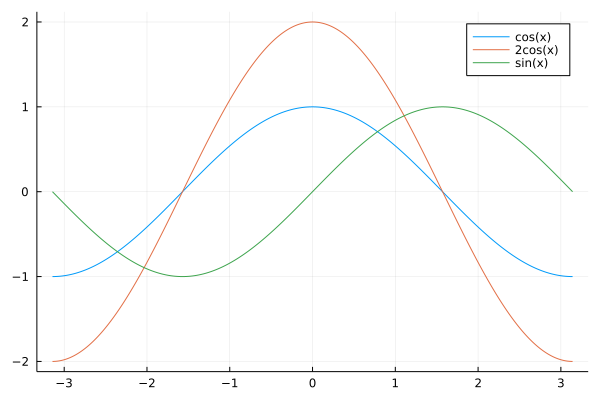

In [172]:
using Plots
x = range(-pi, pi; length=1000) # Create a range of a 1000 evenly spaced numbers between -pi and pi
y = cos.(x) # Create a new vector with `cos` applied to each entry of `x`
plot(x, y; label="cos(x)")
plot!(x, 2y; label="2cos(x)") # ! 表示画同一张图上
plot!(x, sin.(x); label="sin(x)")

Note the `!` is  just a convention: any function that modifies
its input or global state should have `!` at the end of its name.


### Installing packages (advanced)

If you choose to use Julia on your own machine, you may need to install
packages. This can be done by typing the following, either in Jupyter or in the REPL:
`] add Plots`.